In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [24]:
hbar = 6.582e-16 # eV s
omega = 2*np.pi * 100 ## Hz
m = 3.4e13/8 ## mass of 5 nm graphene flake in eV
c = 3e8 #m/s
m_to_um = 1e6
eV_to_meV = 1e3

x0 = np.sqrt(hbar/(2*m/c**2*omega)) * m_to_um ## in micron
p0 = np.sqrt(hbar * m * omega/2) #* eV_to_meV ## in meV
print(x0, p0)

0.10531756190559324 0.9374504898670334


In [25]:
def get_prob(npts, squeeze_fac):
    npts = int(npts)
    rand_x = np.random.randn(npts)*3*x0
    rand_p = np.random.randn(npts)*3*p0
    prob = np.exp( -squeeze_fac*(rand_x/x0)**2 - 1/squeeze_fac*(rand_p/p0)**2 )
    prob /= np.max(prob)
    gpts = np.random.rand(npts) < prob

    x, p = rand_x[gpts], rand_p[gpts]

    return x, p

/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_10564/4021698403.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('squeeze.pdf', dpi=300)
/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_10564/4021698403.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('squeeze.pdf', dpi=300)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


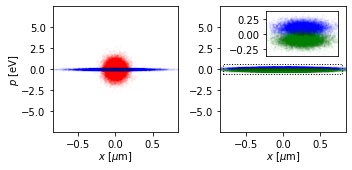

In [34]:
#x,p = np.linspace(-1,1,100), np.linspace(-500,500,100) ## um and meV

#xx, pp = np.meshgrid(x,p)

plt_scale = 8
squeeze_db = 20
squeeze_fac = 10**(-squeeze_db/10)

pts_scale = 10
fig = plt.figure(figsize = (5,2.5))
fig.set_tight_layout(True)
plt.subplot(1, 2, 1)
x, p = get_prob(4e5, 1)
plt.scatter(x, p, c='r', s=1, alpha=0.03, rasterized=True)
plt.xlim(-plt_scale*x0,plt_scale*x0)
#plt.xlim(-0.75, 0.75)
#plt.ylim(-6,6)
plt.ylim(-plt_scale*p0,plt_scale*p0)

## now squeeze
#rand_x = np.random.randn(npts)*3*x0
#rand_p = np.random.randn(npts)*3*p0
#prob = np.exp( -squeeze_fac*(rand_x/x0)**2 - 1/squeeze_fac*(rand_p/p0)**2 )
#prob /= np.max(prob)
#gpts = np.random.rand(npts) < prob
x, p = get_prob(pts_scale*1e5, squeeze_fac)
plt.scatter(x,p, c='b', s=1, alpha=0.01, rasterized=True)
#xx, pp = np.meshgrid( np.linspace(-5*x0,5*x0,100), np.linspace(-5*p0,5*p0,100) )
#prob = np.exp( -0.5*(xx/x0)**2 - 0.5*(pp/p0)**2 )
#plt.contour(xx, pp, prob, levels=[0.32], colors='r')

plt.gca().set_aspect(x0/p0)

plt.xlabel('$x$ [$\mu$m]', labelpad=0)
plt.ylabel('$p$ [eV]', labelpad=0)

plt.subplot(1, 2, 2)

x, p = get_prob(pts_scale*1.5e5, squeeze_fac)
plt.scatter(x, p + 0.100, c='b', s=1, alpha=0.03, rasterized=True)

x, p = get_prob(pts_scale*1.5e5, squeeze_fac)
plt.scatter(x, p - 0.100, c='g', s=1, alpha=0.03, rasterized=True)

plt.xlim(-plt_scale*x0,plt_scale*x0)
#plt.xlim(-0.75, 0.75)
yrescale = 0.1 #0.25
plt.ylim(-plt_scale*p0,plt_scale*p0)

plt.gca().set_aspect(x0/p0) # * 1/yrescale)
plt.xlabel('$x$ [$\mu$m]', labelpad=0)
plt.tight_layout()
#plt.ylabel('$p$ [eV]')

plt.gca().add_patch(Rectangle((-0.8, -0.6), 1.6, 1.2, ec='k', fc='none', ls=":"))

axins = plt.axes((0.75, 0.65, 0.2, 0.25))
x, p = get_prob(pts_scale*0.5e5, squeeze_fac)
axins.scatter(x, p + 0.100, c='b', s=1, alpha=0.03, rasterized=True)

x, p = get_prob(pts_scale*0.5e5, squeeze_fac)
axins.scatter(x, p - 0.100, c='g', s=1, alpha=0.03, rasterized=True)

plt.xlim(-plt_scale*x0,plt_scale*x0)
#plt.xlim(-0.75, 0.75)
yrescale = 0.05 #0.25
plt.ylim(-plt_scale*p0*yrescale,plt_scale*p0*yrescale)
axins.set_xticklabels([])
axins.set_xticks([])


plt.savefig('squeeze.pdf', dpi=300)
plt.show()